In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import  FuncFormatter, MaxNLocator


house_df = pd.read_csv("Arlington_County_Sales_2017.csv")
house_df.head()
pd.set_option("display.max_columns", 500)
counter = 0
for column in house_df:

    if house_df[column].isnull().sum()>= 1000:
        house_df.drop(column, axis=1, inplace = True)
house_df.to_csv("Trimmed")

In [36]:
for ix,row in house_df.iterrows():
    house_df.at[ix,"CloseMonth"] = row['CloseDate'].split('-')[1]

house_df.head()

,FullStreetAddress,Amenities,Appliances,AssessmentYear,Attic,Baths,BathsFull,BathsHalf,Beds,CityName,CloseDate,ClosePrice,ContractDate,County,CountyTax,CountyTaxPaymentFreq,DaysOnMarket,DomProperty,Fireplaces,Foreclosure,Heating,HOA,HotWater,ImprovementAssessmentAmount,ImprovementAssessmentPaymentFreq,InteriorFeatures,LandAssessmentAmount,LandAssessmentPaymentFreq,Stories,ListDate,ListPrice,ListingLowPrice,ListingType,Longitude,ListingID,OriginalListPrice,Ownership,Parking,PropertyType,Remarks,ShowDays,StreetName,StreetNumber,Style,ListingTaxID,TotalAssessment,TotalOpenHouses,TotalShowings,LivingArea,TotalTaxes,TotalTours,Type,YearBuilt,Zip4,PostalCode,CloseMonth
0,3601 5TH ST S #504,NaN,"Dishwasher, Disposal, Refrigerator, Range Hood...",2014.0,No,1,1,0,2,ARLINGTON,2017-02-22,185000.0,2017-01-15,ARLINGTON,1872.62,Annually,688,688,0,False,Summer / Winter Changeover,False,Natural Gas,154100.0,Annually,Floor Plan-Traditional,36400.0,Annually,1,2015-02-27,192500.0,192500.0,Excl. Right,-77.09676,AR8563022,229000.0,Condo,Unassigned,Residential,This condo has been thoroughly renovated just ...,NaN,5TH,3601.0,Contemporary,23-015-111,190500,0,0,1011,1897.38,1,Mid-Rise 5-8 Floors,1958,1636.0,22204,02
1,1600 OAK ST #1915/1914,"Built-in Bookcases, Chair Railing, Crown Moldi...","Cooktop, Dishwasher, Disposal, Dryer, Exhaust ...",2015.0,No,3,2,1,3,ARLINGTON,2017-02-21,1700000.0,2016-11-16,ARLINGTON,NaN,NaN,514,514,0,False,Heat Pump(s),True,Natural Gas,1648000.0,Annually,Floor Plan-Open,122000.0,Annually,1,2015-06-22,1850000.0,1850000.0,Excl. Right,-77.07377,AR8673996,2800000.0,Condo,Garage,Residential,"A blend of two homes-3,390 interior sqft. w/mu...",All Days,OAK,1600.0,Contemporary,17-003-291,1770000,0,0,3390,17629.00,1,Hi-Rise 9+ Floors,1986,2760.0,22209,02
2,1719 GREENBRIER ST,"Attic - Finished, Automatic Garage Door Opener...","ENERGY STAR Dishwasher, ENERGY STAR Refrigerat...",2015.0,Yes,8,7,1,7,ARLINGTON,2017-03-03,1625000.0,2017-01-08,ARLINGTON,7353.82,Annually,489,489,1,False,"ENERGY STAR Heating System, Forced Air, Heat P...",False,"Natural Gas, 60 or More Gallon Tank",173100.0,Annually,Floor Plan-Open,575000.0,Annually,4,2015-09-08,1695000.0,1695000.0,Excl. Right,-77.13037,AR8742330,1751000.0,Fee Simple,"Garage, Basement Garage, Drvwy/Off Str, Paved ...",Residential,New Custom Arts and Crafts home by Calvert Hom...,NaN,GREENBRIER,1719.0,Arts & Crafts,09-016-016,748100,0,0,5994,7451.08,1,Detached,2016,3629.0,22205,03
3,3723 FOUR MILE RUN DR,NaN,"Dishwasher, Disposal, Oven / Range - Gas, Refr...",2015.0,Yes,3,2,1,2,ARLINGTON,2017-01-17,430000.0,2016-12-03,ARLINGTON,3361.86,Annually,121,121,0,False,Forced Air,False,Natural Gas,152000.0,Annually,Floor Plan-Open,190000.0,Annually,3,2015-09-20,475000.0,475000.0,Excl. Right,-77.09023,AR8747453,450000.0,Fee Simple,Street,Residential,Perfect location! This is your client's oppor...,All Days,FOUR MILE RUN,3723.0,Federal,31-030-066,342000,0,1,0,3406.32,1,Semi-Detached,1945,2332.0,22206,01
4,2005 KEY BLVD #11579,"Bathroom(s) - Ceramic Tile, Countertop(s) - Gr...","Dishwasher, Disposal, Exhaust Fan, Microwave, ...",2016.0,No,1,1,0,2,ARLINGTON,2017-04-07,362000.0,2017-03-06,ARLINGTON,3386.81,Annually,81,81,0,False,"Heat Pump(s), Forced Air",True,Electric,309700.0,Annually,Floor Plan-Traditional,36600.0,Annually,1,2016-12-10,365000.0,365000.0,Excl. Right,-77.08380,AR9823220,369000.0,Condo,Street,Residential,Fully updated 2BR/1BA corner unit in Colonial ...,NaN,KEY,2005.0,Rambler,16-026-213,346300,0,0,852,3431.80,0,Garden 1-4 Floors,1940,NaN,22201,04


In [37]:
mean=house_df.groupby("CloseMonth").mean()
mean_org=mean[["ClosePrice"]]
#mean_org=mean["ClosePrice"]=mean_org=mean["ClosePrice"].map("${:,.2f}".format)
mean_org.head()    

,ClosePrice
CloseMonth,
01,621377.368750
02,659519.503030
03,640787.904000
04,682190.573705
05,696128.954605


In [38]:
median_df=house_df.groupby("CloseMonth").median()
median_df=median_df[["ClosePrice"]]
mean_org.head()  
median_df["ClosePrice"]

CloseMonth
01    552450.0
02    542000.0
03    517500.0
04    625000.0
05    620000.0
06    630950.0
07    585000.0
08    545000.0
09    523300.0
10    599900.0
11    582000.0
12    575000.0
Name: ClosePrice, dtype: float64

In [40]:
plt.clf()

In [41]:
mode=house_df.groupby("CloseMonth").agg({'ClosePrice': lambda x:stats.mode(x)[0]})


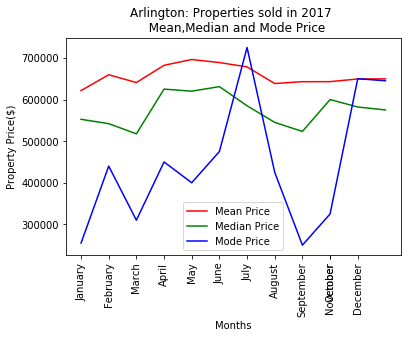

In [42]:

mean_gr,=plt.plot(mean_org,color="red", label="Mean Price")
median_line,=plt.plot(median_df,color="green", label="Median Price")
mode_line,=plt.plot(mode,color="blue", label="Mode Price")
plt.legend(loc="best")
labels=("January","February","March","April","May","June","July","August","September","October","November","December")
loc = range(0,len(mean_org))
plt.xticks(loc,labels, rotation='vertical')
plt.title("Arlington: Properties sold in 2017 \n  Mean,Median and Mode Price")
plt.xlabel("Months")
plt.ylabel("Property Price($)")
plt.show()
plt.savefig('real_estate.png')
